In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.3 KB


In [60]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Now let’s split the data and train a Logistic Regression model on the training set:

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [47]:
X = df[["petal width (cm)"]]

In [56]:
y = df["species"] == "virginica"

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector

In [67]:
y_proba = log_model.predict_proba(X_new)

In [68]:
y_proba

array([[0.99822633, 0.00177367],
       [0.99820582, 0.00179418],
       [0.99818506, 0.00181494],
       ...,
       [0.00574788, 0.99425212],
       [0.00568241, 0.99431759],
       [0.00561769, 0.99438231]])

In [72]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0].  #First true value where y_proba is greater than 0.5 in X_new 

In [74]:
decision_boundary

1.6516516516516517

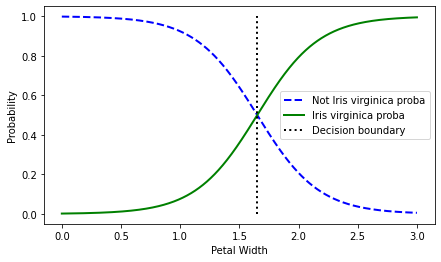

In [85]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
           label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.xlabel("Petal Width")  
plt.ylabel("Probability") 
plt.legend();

In [87]:
log_model.predict([[1.7], [1.5]])

array([ True, False])

**Softmax Regression** 

In [90]:
X = df[["petal length (cm)", "petal width (cm)"]]
y = df["species"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
softmax_reg = LogisticRegression(C=30, random_state=42, )
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [93]:
softmax_reg.predict([[5, 2]])

array(['virginica'], dtype=object)

In [94]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])